In [1]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plots in Jupyter
%matplotlib inline
sns.set(style='whitegrid')

In [3]:
# 📂 Step 2: Load the Dataset
# Make sure the file is in the same directory or adjust the path
df = pd.read_csv("Telco-Customer-Churn.csv")

# Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# 🔍 Step 3: Initial Exploration
# Shape of the dataset
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Data types and non-null counts
df.info()

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

Rows: 7043, Columns: 21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

In [5]:
# ⚠️ Step 4: Convert TotalCharges to Numeric
# There are some blank strings that cause issues when converting to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many were converted to NaN
print("Missing values after conversion:", df['TotalCharges'].isna().sum())

# Drop rows with NaN in TotalCharges
df = df.dropna(subset=['TotalCharges'])

# Reset index after dropping rows
df = df.reset_index(drop=True)

Missing values after conversion: 11


In [6]:
# 🎯 Step 5: Encode Target Variable
# 'Churn' column: Yes -> 1, No -> 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Check the value counts of the target
print(df['Churn'].value_counts())

Churn
0    5163
1    1869
Name: count, dtype: int64


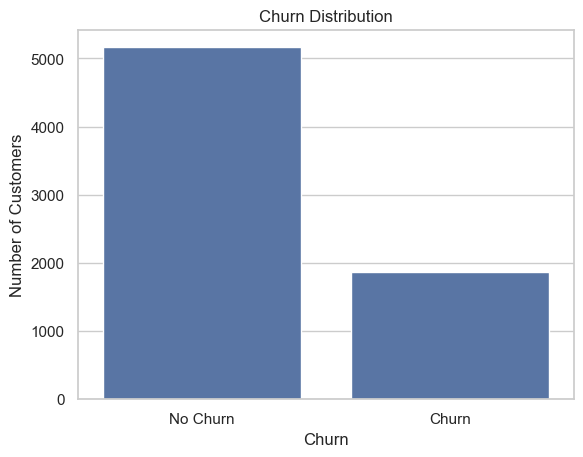

In [7]:
# 📊 Step 6: Basic Visualization
# Plot the churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.ylabel("Number of Customers")
plt.show()

In [8]:
# 💾 Step 7: Save Cleaned Dataset
df.to_csv("cleaned_telco_churn.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_telco_churn.csv'")

✅ Cleaned dataset saved as 'cleaned_telco_churn.csv'
